In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN

In [31]:
datas = pd.read_csv("compound.txt",sep="\s+").values
print(datas)

[[29.8  22.15  1.  ]
 [31.55 21.1   1.  ]
 [27.7  20.85  1.  ]
 ...
 [15.6   9.45  6.  ]
 [15.3   9.15  6.  ]
 [15.1   9.55  6.  ]]


Text(0.5, 1.0, 'Grafik Datas')

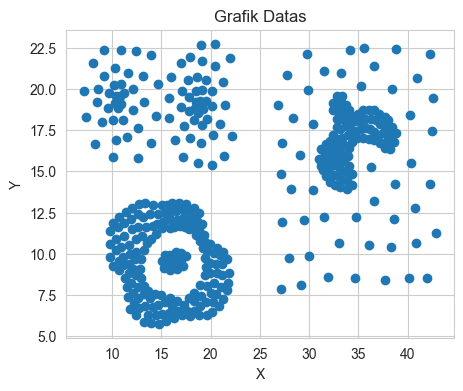

In [32]:
plt.scatter(datas[:,0],datas[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Grafik Datas")

In [33]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(datas[:,:-1])

DBSCAN(eps=2)

Jumlah Klaster:3


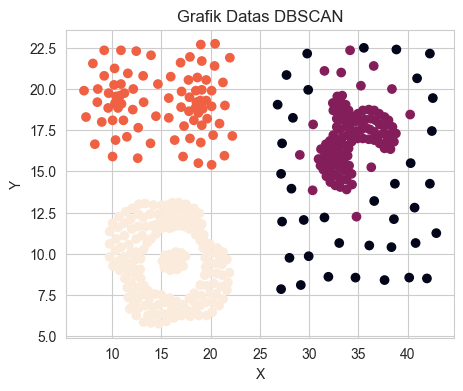

In [34]:
plt.scatter(datas[:,-0],datas[:,1], c=dbscan.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Grafik Datas DBSCAN")
plt.show
print("Jumlah Klaster:{}".format(len(set(dbscan.labels_[np.where(dbscan.labels_!=1)]))))

In [35]:
print(dbscan.labels_)

[-1  0 -1 -1 -1 -1  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

In [36]:
si = silhouette_score(datas,dbscan.labels_)
print(si)

0.46776502837468437


In [12]:
import numpy as np
from scipy.spatial import distance
from scipy.sparse import csr_matrix

# Matriks sparse contoh
data = np.array([0.1, 0.2, 0.0, 0.4, 0.0, 0.6, 0.0, 0.0, 0.9])
row_indices = np.array([0, 0, 1, 1, 2, 2, 3, 3, 3])
col_indices = np.array([0, 1, 0, 1, 2, 3, 2, 3, 4])
sparse_matrix = csr_matrix((data, (row_indices, col_indices)), [shape=(4, 5)])

# Konversi matriks sparse menjadi matriks jarak (Euclidean Distance)
dense_matrix = sparse_matrix.toarray()  # Konversi matriks sparse menjadi matriks dense
distance_matrix = distance.cdist(dense_matrix, dense_matrix, 'euclidean')

print("Matriks Jarak (Euclidean Distance):")
print(distance_matrix)


SyntaxError: invalid syntax (3894303099.py, line 9)

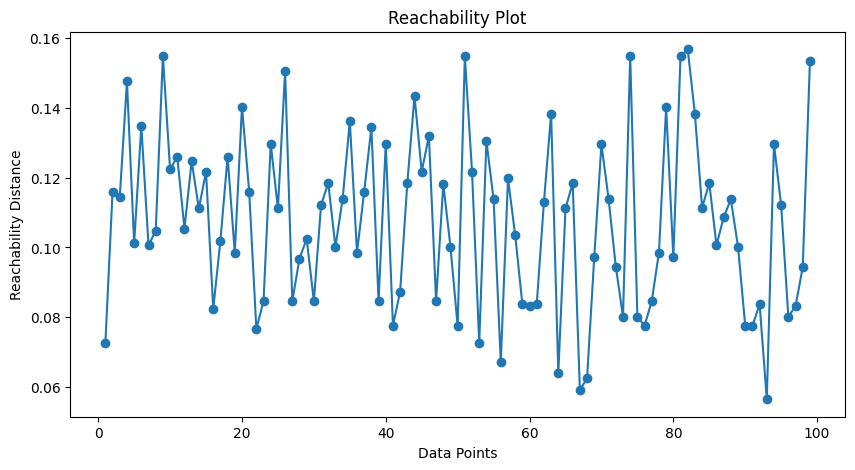

In [1]:
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Buat data contoh
np.random.seed(0)
X = np.random.rand(100, 2)

# Buat objek OPTICS dengan parameter yang sesuai
clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Lakukan clustering pada data
clustering.fit(X)

# Ambil reachability distances dari hasil clustering
reachability = clustering.reachability_

# Plot reachability plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(reachability)), reachability, marker='o')
plt.title('Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()


In [15]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
optics_model = OPTICS(eps=0.75, min_samples=10)

# assign each data point to a cluster
optics_result = optics_model.fit_predict(training_data)

# get all of the unique clusters
optics_clusters = unique(optics_clusters)

# plot OPTICS the clusters
for optics_cluster in optics_clusters:
    # get data points that fall in this cluster
    index = where(optics_result == optics_clusters)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the OPTICS plot
pyplot.show()

ValueError: operands could not be broadcast together with shapes (1000,) (17,) 